# Assignment 2 - Regression (Expander_data.csv)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\Akshat Jain\\Downloads\\Expander_data.csv")
df.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [3]:
df.shape

(296450, 9)

In [4]:
df.isnull().sum()

Timestamp                          0
Suction Pressure (psig)            0
Suction Temperature (F)            0
Total Flow (gpm)                   0
Speed (rpm)                        0
By-pass Valve Position (%)         0
Discharge Pressure (psig)          0
Discharge Temperature (F)          0
Run Status                    296450
dtype: int64

In [5]:
df = df.drop(columns = 'Run Status')
df.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296450 entries, 0 to 296449
Data columns (total 8 columns):
Timestamp                     296450 non-null object
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
dtypes: float64(7), object(1)
memory usage: 18.1+ MB


In [7]:
df

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795
5,1/4/2020 21:21,594.415722,-229.595078,8142.742624,3012.234024,6.0,207.115318,-227.815428
6,1/4/2020 21:21,597.170202,-230.133506,7964.420754,3012.518826,6.0,220.471189,-228.346539
7,1/4/2020 21:21,603.331813,-229.551912,8139.809812,3010.796870,6.0,218.614349,-227.744417
8,1/4/2020 21:22,595.013360,-229.575425,8047.233812,2995.877540,6.0,218.631897,-227.790784
9,1/4/2020 21:22,598.340373,-229.808081,8125.062853,3011.871916,6.0,212.304464,-228.027485


In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')
df.head()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F)
Timestamp,,,,,,,
2020-01-04 21:20:00,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448
2020-01-04 21:20:00,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636
2020-01-04 21:20:00,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324
2020-01-04 21:20:00,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113
2020-01-04 21:21:00,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795


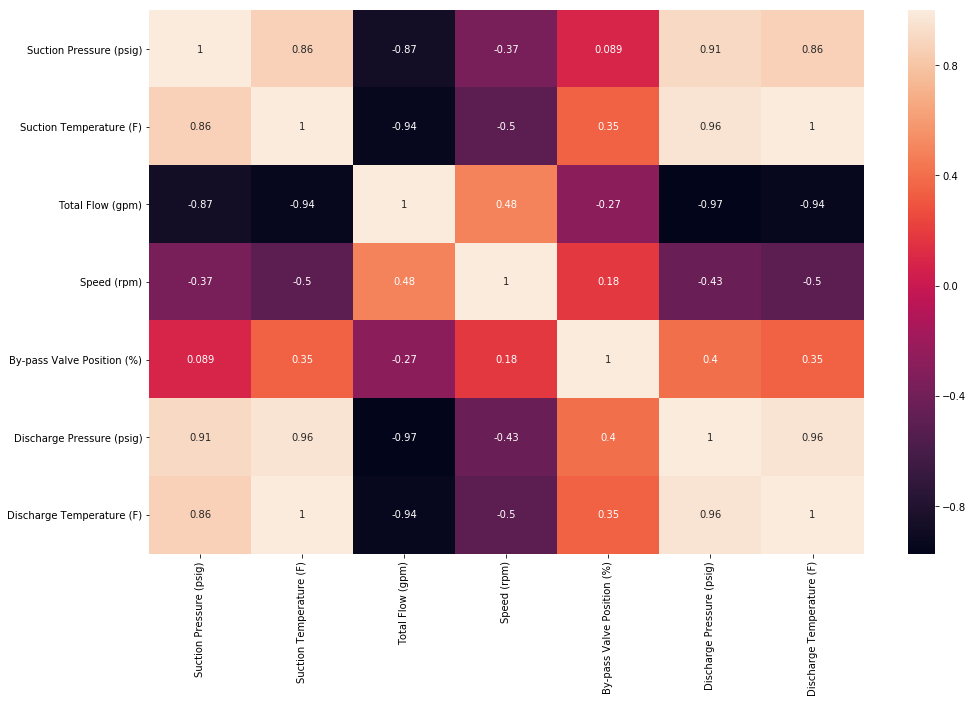

In [9]:
#Check Correlation between Columns 
correlation = df.corr() 
fig, ax = plt.subplots(figsize=(16,10)) 
ax = sns.heatmap(correlation ,annot = True)

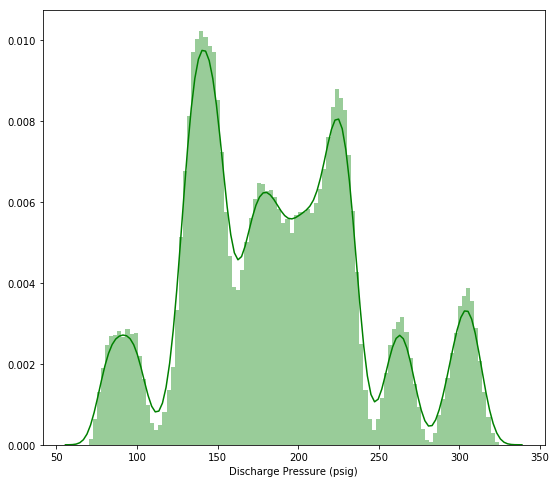

In [16]:
plt.figure(figsize=(9, 8))
sns.distplot(df['Discharge Pressure (psig)'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [10]:
X=df.iloc[:,[0,1,2,3,4,6]].values
Y=df.iloc[:,5].values

In [11]:
Y

array([226.0449315, 217.1509736, 226.0540858, ..., 231.3367608,
       220.6756921, 207.9314276])

In [12]:
#split dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Apply various regression models and find out which model is the best for this dataset
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#predict the test set results
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(" rmse value of Linear Regression is : ",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)


#Decision Tree Classifies
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(" rmse value of Decision tree Regression is : ",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)


# Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(" rmse value of Random forest Regression is : ",rmse)
r2 = r2_score(y_test, y_pred)
print(r2)


 rmse value of Linear Regression is :  2.4533918585186396
0.9981050587394696
 rmse value of Decision tree Regression is :  1.8600607107967209
0.9989107786344341
 rmse value of Random forest Regression is :  1.4640534231805853
0.9993251989316616
